# doc2vec modeling of wikipedia

This noteboook results in a doc2vec model of simple english wikipedia

## dependencies

In [1]:
import gensim 
import pandas as pd
import langdetect

## Loading processed wiki-data

In [2]:
wiki_data = pd.read_csv('data/wikipedia/cleaned_wiki_data_full_text_chunks.csv')
len(wiki_data)

152895

##  Removing short documents, duplicates, and non-english documents

In [5]:
# Filtering out all fo the short documents

wiki_data = wiki_data[wiki_data.text.apply(lambda x: len(x) > 500)]


# Removing articles that use dominantly non-english words
is_enlish = wiki_data.text.apply(lambda x: langdetect.detect(x) == 'en')
wiki_data = wiki_data[is_enlish]

In [12]:
# Removing duplicates

removed_duplicates = wiki_data.text.drop_duplicates()
len(removed_duplicates)

67667

## Converting corpus into simple tokens

In [10]:
def read_corpus(list_of_docs, tokens_only=False):
    for i, line in enumerate(list_of_docs):
        if tokens_only:
            yield gensim.utils.simple_preprocess(line)
        else:
            # For training data, add tags
            yield gensim.models.doc2vec.TaggedDocument(gensim.utils.simple_preprocess(line), [i])

In [13]:
train_corpus = list(read_corpus(removed_duplicates))
test_corpus = list(read_corpus(removed_duplicates, tokens_only=True))

# Training doc2vec model

## Without skip grams

In [29]:
for vector_size in [300]:
    model = gensim.models.doc2vec.Doc2Vec(vector_size=vector_size, min_count=10, epochs=50, workers=4)
    print(vector_size)
    model.build_vocab(train_corpus)
    model.train(train_corpus, total_examples=model.corpus_count, epochs=model.epochs)
    print(vector_size, 'done')
    model.save('models/simple_wiki_chunked_word_limited_doc2vec_' + str(vector_size) + '_vector_10_min_word_epoch_' + str(50))

300
300 done


In [30]:
epochs = 50

while epochs < 1000:
    epochs += 50
    model.train(train_corpus, total_examples=model.corpus_count, epochs=50)
    model.save('models/simple_wiki_chunked_word_limited_english_doc2vec_' + str(vector_size) + '_vector_10_min_word_epoch_' + str(epochs))
    print(epochs)

100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000


## With Skip grams

In [ ]:
for vector_size in [300]:
    model = gensim.models.doc2vec.Doc2Vec(vector_size=vector_size, min_count=10, epochs=50, workers=4, dbow_words=1)
    print(vector_size)
    model.build_vocab(train_corpus)
    model.train(train_corpus, total_examples=model.corpus_count, epochs=model.epochs)
    print(vector_size, 'done')
    model.save('models/SWC_onlyENG_doc2vec_skip_gram' + str(vector_size) + '_vector_10_min_word_epoch_' + str(50))

In [ ]:
epochs = 50

while epochs < 1000:
    epochs += 50
    model.train(train_corpus, total_examples=model.corpus_count, epochs=epochs)
    model.save('models/SWC_onlyENG_doc2vec_skip_gram' + str(vector_size) + '_vector_10_min_word_epoch_' + str(epochs))
    print(epochs)

# Looking at the consistency of these things

In [9]:
topics = ['The domestic cat is a small, typically furry, carnivorous mammal. They are often called house cats[5] when kept as indoor pets or simply cats when there is no need to distinguish them from other felids and felines. They are often valued by humans for companionship and for their ability to hunt vermin. There are more than seventy cat breeds recognized by various cat registries.',
          "Association football, more commonly known as football or soccer,[a] is a team sport played between two teams of eleven players with a spherical ball. It is played by 250 million players in over 200 countries and dependencies, making it the world's most popular sport.[5][6][7][8] The game is played on a rectangular field with a goal at each end. The object of the game is to score by moving the ball beyond the goal line into the opposing goal.",
         "Amazon.com Inc said on Tuesday it would raise its minimum wage to $15 per hour for U.S. employees from next month, giving ground to critics of poor pay and working conditions at the world’s second most valuable company.",
         " France said on Tuesday there was no doubt Iran’s intelligence ministry was behind a June plot to attack an exiled opposition group’s rally outside Paris and it seized assets belonging to Tehran’s intelligence services and two Iranian nationals."]

In [10]:
from gensim.utils import simple_preprocess

In [11]:
epochs = 1000
vector_size = 300

model = gensim.models.Doc2Vec.load('models/simple_wiki_chunked_word_limited_english_doc2vec_' + str(vector_size) + '_vector_10_min_word_epoch_' + str(epochs))


In [13]:
vector = model.infer_vector(simple_preprocess(topics[0]), epochs=1000)
model.docvecs.most_similar([vector])

/home/wmvoje/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[(1003, 0.34445491433143616),
 (43430, 0.3391963541507721),
 (28072, 0.33067113161087036),
 (64547, 0.32810425758361816),
 (24836, 0.3272174000740051),
 (33116, 0.32587265968322754),
 (8916, 0.32214438915252686),
 (57545, 0.32103708386421204),
 (8917, 0.32016515731811523),
 (41391, 0.31908485293388367)]

In [16]:
test_corpus[28072]

['the',
 'town',
 'grew',
 'from',
 'farm',
 'owned',
 'by',
 'ex',
 'convict',
 'hotel',
 'inn',
 'keeper',
 'timothy',
 'beard',
 'it',
 'was',
 'on',
 'the',
 'banks',
 'of',
 'the',
 'molonglo',
 'river',
 'the',
 'original',
 'name',
 'was',
 'quinbean',
 'which',
 'means',
 'clear',
 'waters',
 'queanbeyan',
 'became',
 'township',
 'in',
 'there',
 'were',
 'about',
 'people',
 'living',
 'there',
 'some',
 'of',
 'the',
 'important',
 'historic',
 'buildings',
 'still',
 'standing',
 'were',
 'built',
 'in',
 'the',
 'early',
 'days',
 'traces',
 'of',
 'gold',
 'were',
 'found',
 'in',
 'there',
 'were',
 'also',
 'some',
 'lead',
 'and',
 'silver',
 'mines',
 'settlers',
 'were',
 'often',
 'wikt',
 'rob',
 'robbed',
 'by',
 'bushranger',
 'including',
 'john',
 'tennant',
 'jacky',
 'jacky',
 'frank',
 'gardiner',
 'and',
 'ben',
 'hall',
 'in',
 'the',
 'government',
 'built',
 'post',
 'office',
 'at',
 'queanbeyan',
 'the',
 'sydney',
 'gazette',
 'and',
 'new',
 'south',

In [51]:
'models/simple_wiki_chunked_word_limited_english_doc2vec_' + str(vector_size) + '_vector_10_min_word_epoch_' + str(epochs)

'models/simple_wiki_chunked_word_limited_english_doc2vec_300_vector_10_min_word_epoch_1000'

In [3]:
import pickle as p

# with open('models/simple_wiki_chunked_corpus_english_only_10_count_cutoff.p', 'wb') as topick:
#     p.dump(test_corpus, topick)

with open('models/simple_wiki_chunked_corpus_english_only_10_count_cutoff.p', 'rb') as unpick:
    test_corpus = p.load(unpick)

# Testing number of epochs to use when inferring vector

In [240]:
from itertools import combinations
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
%matplotlib inline

In [248]:
import pandas as pd

In [287]:
cosine_data_frame = pd.DataFrame(columns=['vector_size', 'document', 'epochs', 'cosine'])

In [294]:
vector_sizes = [50, 100, 150, 200, 250]
vector_sizes.extend([25, 75, 125, 175, 225])

dataframe_index = 0
for vector_size in vector_sizes:
    
    model = gensim.models.Doc2Vec.load('models/simple_wiki_chunked_doc2vec_'+str(vector_size)+'_vector_10_min_word')
    for epochs in [200]:
        for topic_index, topic in enumerate([topics[0]]):
            list_of_arrays = []
            for i in range(10):
                list_of_arrays.append(model.infer_vector(simple_preprocess(topic), epochs=epochs))
            for vec1, vec2 in combinations(list_of_arrays, 2):
#                 cosine_numbers.append(cosine_similarity([vec1], [vec2]))
                cosine_data_frame.loc[dataframe_index] = [vector_size, topic_index, epochs, cosine_similarity([vec1], [vec2])]
                dataframe_index += 1

In [295]:
cosine_data_frame.cosine = cosine_data_frame.cosine.apply(lambda x: float(x))

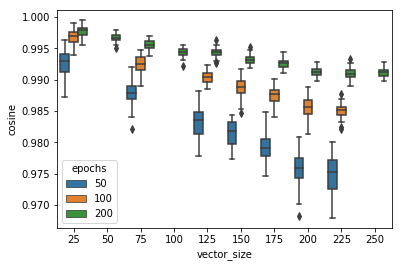

In [296]:
sns.boxplot(x='vector_size', hue='epochs', y='cosine', data=cosine_data_frame)

# 